In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


mpl.rcParams.update({'font.size': 20})

In [2]:
df = pd.read_csv('vyhodnotenie_formularu.tsv', sep='\t')
df = df.replace('reálna', 1).replace('vygenerovaná', 0)
dataset = df.iloc[0, 3:-1]

df = df.iloc[1:, 1:]
df.columns = ['occupation', 'years_of_experience'] + [i for i in range(1, 71)] + ['decision_explanation']
df = df.query('occupation != "iné"')
df['user_id'] = [i for i in range(len(df))]

metadata = df.loc[:, ['user_id', 'occupation', 'years_of_experience' ,'decision_explanation']]
df

,occupation,years_of_experience,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,decision_explanation,user_id
2,dentálny/a hygienik/čka,7,1,0,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,podľa mäkkých tkanív,0
3,zubný/á asisent/ka,15,0,0,1,0,1,1,1,0,...,0,0,1,0,1,0,1,1,podľa zubov,1
4,zubný/á lekár/ka,12,1,0,1,1,1,1,1,1,...,0,1,1,1,0,1,1,1,podľa mäkkých tkanív,2
5,zubný/á asisent/ka,1,0,0,1,1,0,1,1,1,...,0,1,0,1,0,1,0,1,podľa zubov,3
6,zubný/á lekár/ka,3,1,0,1,1,0,1,1,1,...,0,1,0,1,0,1,0,1,podľa mäkkých tkanív,4
7,dentálny/a hygienik/čka,Študent,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,podľa mäkkých tkanív,5
8,zubný/á asisent/ka,1,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,podľa mäkkých tkanív,6
9,zubný/á lekár/ka,3,1,0,1,0,0,1,1,1,...,1,1,1,1,0,1,1,1,podľa mäkkých tkanív,7
10,zubný/á lekár/ka,4,1,0,1,1,1,0,0,1,...,0,0,1,0,0,1,1,0,podľa mäkkých tkanív,8
11,zubný/á lekár/ka,2,1,0,1,1,0,1,1,1,...,1,1,0,1,0,1,0,1,podľa mäkkých tkanív,9


In [3]:
df_melted = df.melt(id_vars=['user_id', 'occupation', 'years_of_experience', 'decision_explanation'], value_vars=[i for i in range(1, 71)], var_name='image_id', value_name='is_real')
df_melted['dataset'] = [dataset[i - 1] for i in df_melted.image_id]
df_melted['truth'] = [('real' in i)*1 for i in df_melted.dataset]
# df_melted.astype({'truth': 'int'}).dtypes
df_melted

,user_id,occupation,years_of_experience,decision_explanation,image_id,is_real,dataset,truth
0,0,dentálny/a hygienik/čka,7,podľa mäkkých tkanív,1,1,stylegan_front,0
1,1,zubný/á asisent/ka,15,podľa zubov,1,0,stylegan_front,0
2,2,zubný/á lekár/ka,12,podľa mäkkých tkanív,1,1,stylegan_front,0
3,3,zubný/á asisent/ka,1,podľa zubov,1,0,stylegan_front,0
4,4,zubný/á lekár/ka,3,podľa mäkkých tkanív,1,1,stylegan_front,0
...,...,...,...,...,...,...,...,...
1045,10,dentálny/a hygienik/čka,21,podľa mäkkých tkanív,70,0,stylegan_mixright,0
1046,11,zubný/á lekár/ka,1,"podľa tieňov, symetrie zubov",70,1,stylegan_mixright,0
1047,12,zubný/á lekár/ka,5,podľa mäkkých tkanív,70,1,stylegan_mixright,0
1048,13,dentálny/a hygienik/čka,1,podľa zubov,70,1,stylegan_mixright,0


In [10]:
performance = df_melted.loc[:, ['dataset', 'image_id', 'is_real']].groupby(['dataset', 'image_id']).apply(np.mean).drop('image_id', axis=1).reset_index()
performance['dataset_label'] = [i.replace('_', ' ').capitalize().replace('gan', 'GAN').replace('Gan', 'GAN') for i in performance.dataset]
performance = performance.replace('GANformer', 'GANformer front')
performance['model'] = [i.split('_')[0] for i in performance.dataset]
performance

,dataset,image_id,is_real,dataset_label,model
0,ganformer,2,0.000000,GANformer front,ganformer
1,ganformer,13,0.066667,GANformer front,ganformer
2,ganformer,22,0.000000,GANformer front,ganformer
3,ganformer,62,0.000000,GANformer front,ganformer
4,ganformer,67,0.066667,GANformer front,ganformer
...,...,...,...,...,...
65,stylegan_upper,21,0.733333,StyleGAN upper,stylegan
66,stylegan_upper,26,0.733333,StyleGAN upper,stylegan
67,stylegan_upper,30,0.733333,StyleGAN upper,stylegan
68,stylegan_upper,38,0.733333,StyleGAN upper,stylegan


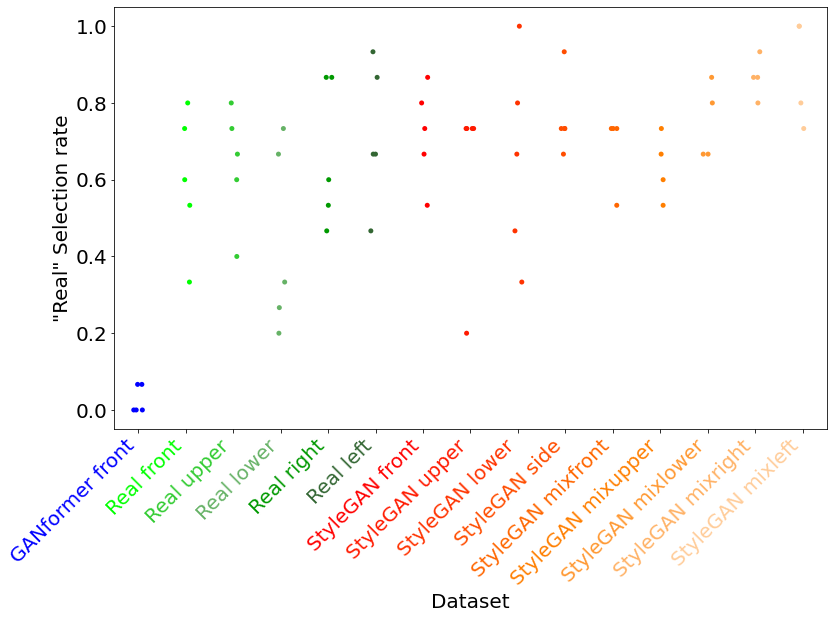

In [15]:
# COLORS = ['blue', 'orange']
# PALETTE = [COLORS[i % 2] for i in range(len(np.unique(performance.dataset)))]
PALETTE = [
    "blue", # ganformer
    "#00FF00", "#33CC33", "#66B266", "#009900", "#336633", # real
    "#FF0000", "#FF1A00", "#FF3300", "#FF4D00", "#FF6600", "#FF7F00", "#FF9933", "#FFB266", "#FFCC99" # stylegan
]

fig, ax = plt.subplots(1, 1, figsize=(12, 9))

sns.stripplot(
    data=performance,
    x='dataset_label',
    y='is_real',
    palette=PALETTE,
    ax=ax,
    order=["GANformer front"] + [f"Real {i}" for i in ["front", "upper", "lower", "right", "left"]] + [f"StyleGAN {i}" for i in ["front", "upper", "lower", "side", "mixfront", "mixupper", "mixlower", "mixright", "mixleft"]]
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

[t.set_color(PALETTE[i]) for i, t in enumerate(ax.xaxis.get_ticklabels())]
fig.set_facecolor('white')

ax.set_xlabel('Dataset')
ax.set_ylabel('"Real" Selection rate')

fig.tight_layout()
plt.savefig('images/real_selection_rate_datasets.png', dpi=200)

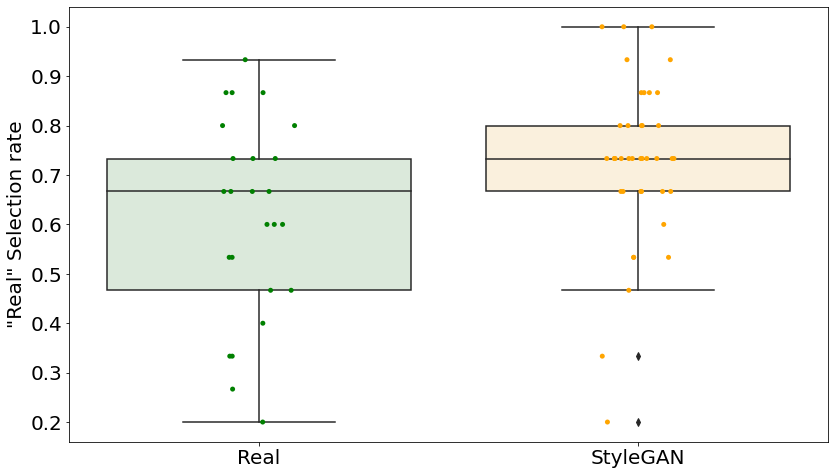

In [14]:
PALETTE = ['green', 'orange']

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

sns.stripplot(data=performance.query('model != "ganformer"'), x='model', y='is_real', palette=PALETTE)
ax = sns.boxplot(data=performance.query('model != "ganformer"'), x='model', y='is_real', palette=PALETTE)
for patch in ax.artists:
    fc = patch.get_facecolor()
    patch.set_facecolor(mpl.colors.to_rgba(fc, 0.15))

ax.set_xlabel('')
ax.set_ylabel('"Real" Selection rate')

ax.set_xticklabels(['Real', 'StyleGAN'])
fig.tight_layout()

plt.savefig('images/real_vs_stylegan.png', dpi=200)

In [16]:
df_melted

,user_id,occupation,years_of_experience,decision_explanation,image_id,is_real,dataset,truth
0,0,dentálny/a hygienik/čka,7,podľa mäkkých tkanív,1,1,stylegan_front,0
1,1,zubný/á asisent/ka,15,podľa zubov,1,0,stylegan_front,0
2,2,zubný/á lekár/ka,12,podľa mäkkých tkanív,1,1,stylegan_front,0
3,3,zubný/á asisent/ka,1,podľa zubov,1,0,stylegan_front,0
4,4,zubný/á lekár/ka,3,podľa mäkkých tkanív,1,1,stylegan_front,0
...,...,...,...,...,...,...,...,...
1045,10,dentálny/a hygienik/čka,21,podľa mäkkých tkanív,70,0,stylegan_mixright,0
1046,11,zubný/á lekár/ka,1,"podľa tieňov, symetrie zubov",70,1,stylegan_mixright,0
1047,12,zubný/á lekár/ka,5,podľa mäkkých tkanív,70,1,stylegan_mixright,0
1048,13,dentálny/a hygienik/čka,1,podľa zubov,70,1,stylegan_mixright,0


In [18]:
np.unique(df.decision_explanation, return_counts=True)

(array(['podľa mäkkých tkanív', 'podľa tieňov, symetrie zubov',
        'podľa zubov'], dtype=object),
 array([11,  1,  3]))